In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
df = pd.read_csv("economic_index.csv", delimiter=",")

In [31]:
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [32]:
df.drop(columns=["Unnamed: 0", "year", "month"], axis=1, inplace=True)

In [33]:
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


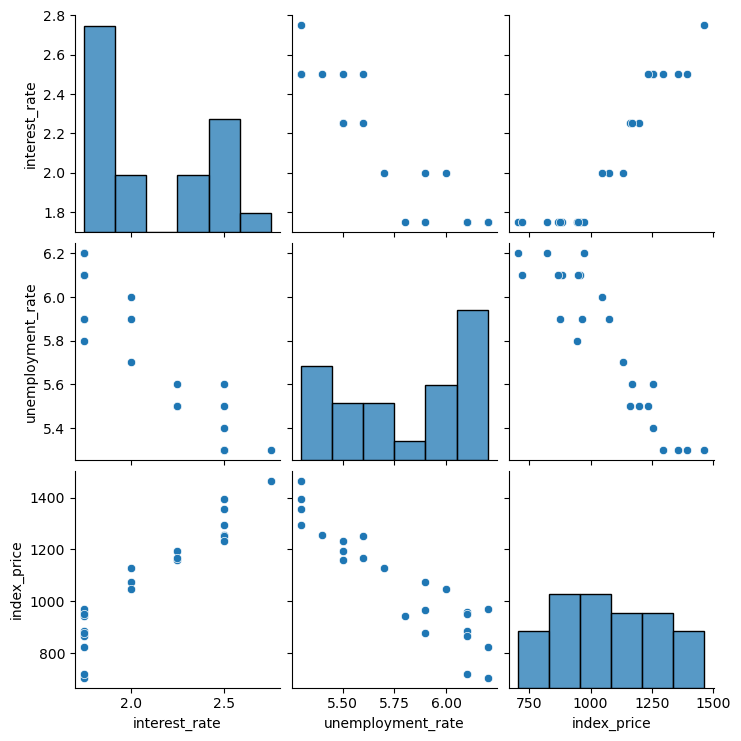

In [34]:
sns.pairplot(df)

In [35]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


In [36]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
print(X, y)

    interest_rate  unemployment_rate
0            2.75                5.3
1            2.50                5.3
2            2.50                5.3
3            2.50                5.3
4            2.50                5.4
5            2.50                5.6
6            2.50                5.5
7            2.25                5.5
8            2.25                5.5
9            2.25                5.6
10           2.00                5.7
11           2.00                5.9
12           2.00                6.0
13           1.75                5.9
14           1.75                5.8
15           1.75                6.1
16           1.75                6.2
17           1.75                6.1
18           1.75                6.1
19           1.75                6.1
20           1.75                5.9
21           1.75                6.2
22           1.75                6.2
23           1.75                6.1 0     1464
1     1394
2     1357
3     1293
4     1256
5     1254
6     123

In [37]:
print(X.shape, y.shape)

(24, 2) (24,)


<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

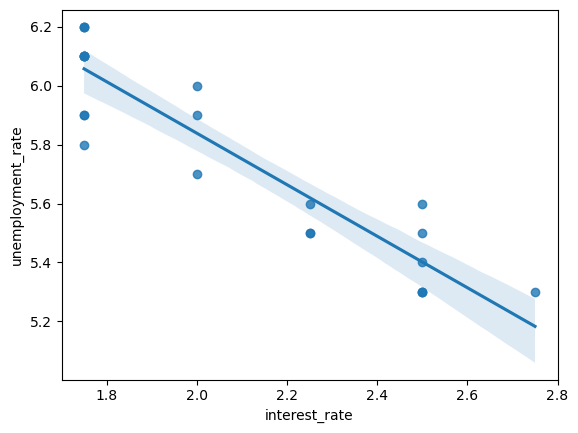

In [38]:
sns.regplot(x="interest_rate", y="unemployment_rate", data=df)

In [39]:
# Train Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)
print(X_test.shape, X_train.shape)

(6, 2) (18, 2)


In [40]:
# STANDARDIZATION

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [41]:
# Applying Linear Regression Model
from sklearn.linear_model import LinearRegression

regression = LinearRegression(n_jobs=-1)

regression.fit(X_train, y_train)

LinearRegression(n_jobs=-1)

In [42]:
# Cross Validation
from sklearn.model_selection import cross_val_score

validate_score = cross_val_score(
    regression, X_train, y_train, scoring="neg_mean_squared_error", cv=3
)
validate_score

array([-4921.61331265, -7686.87497294, -5135.9962549 ])

In [43]:
np.mean(validate_score)

-5914.828180162388

In [44]:
# Predicting Test Data

y_pred = regression.predict(X_test)
y_pred

array([1204.22770398,  821.65051903, 1406.51300368,  857.70889608,
        994.90992298, 1168.16932693])

In [51]:
# PERFORMANCE METRICS
from sklearn.metrics import mean_absolute_error, mean_squared_error

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

from sklearn.metrics import r2_score

score = r2_score(y_test, y_pred)
adjusted_r2_score = 1 - (
    (1 - score) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
)

print(
    f"MSE: {mse}\nMAE: {mae}\nRMSE:{rmse}\nR_Squared: {score}\nAdjusted R_Squared: {adjusted_r2_score}"
)

MSE: 5793.76288771258
MAE: 59.93578152323554
RMSE:76.11677139574813
R_Squared: 0.8278978091457142
Adjusted R_Squared: 0.713163015242857


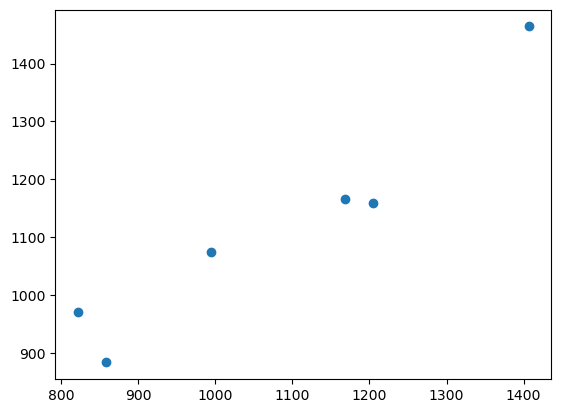

In [52]:
# Assumption and Checkings
plt.scatter(y_pred, y_test)

In [54]:
residuals = y_test - y_pred
residuals

8     -45.227704
16    149.349481
0      57.486996
18     26.291104
11     80.090077
9      -1.169327
Name: index_price, dtype: float64

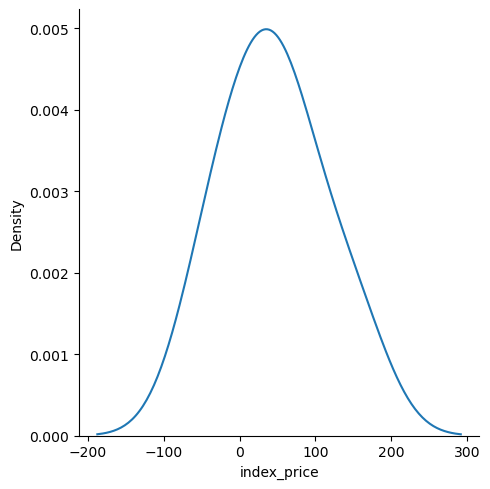

In [55]:
sns.displot(residuals, kind="kde")

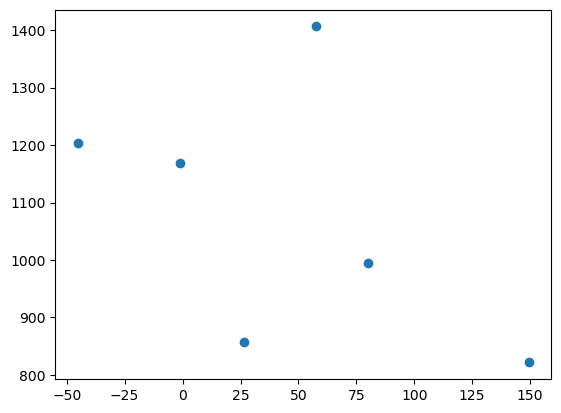

In [57]:
plt.scatter(residuals, y_pred)

In [62]:
# Linear Regression using OLS
import statsmodels.api as sm

model = sm.OLS(y_train, X_train).fit()

In [63]:
model.predict(X_test)

array([ 150.78325954, -231.79392541,  353.06855924, -195.73554836,
        -58.53452146,  114.72488249])

In [64]:
regression.coef_

array([  88.27275507, -116.25716066])

In [67]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Sat, 03 May 2025   Prob (F-statistic):                       0.754
Time:                        16:26:16   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  res = hypotest_fun_out(*samples, **kwds)


In [68]:
# Predicting Some New Data
regression.predict(scaler.transform([["2.75", "5.4"]]))

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([1370.45462663])